# ***Title:-Fake News Detection Using Machine Learning***

# ***Problem Statement***

Fake news has become a significant issue, especially on social media and online news platforms. The goal of this project is to develop a machine learning model that can automatically classify news articles as fake or real based on textual content. By Natural Language Processing (NLP it helps computers understand human language) and machine learning algorithms, the system aims to detect and prevent the spread of misinformation.

# ***About Dataset***

● Features: The dataset contains four columns: Unnamed: 0 (index), title (news
headline), text (news content), and label (indicating whether the news is fake or
real).

● Target Variable: label (0 = Fake News, 1 = Real News).

# ***Step 1: Load the Dataset***

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import pandas as pd

# Try with ISO-8859-1 encoding
df = pd.read_csv(r"C:\Users\Pc\OneDrive\Desktop\fake_news_app\cleaned_fake_news (1).csv", encoding='ISO-8859-1')

df

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...,1.0
1,factbox trump fills top jobs administration,post votes hillary already,1.0
2,unbelievable obama attorney general says charl...,demonstrators gathered last night exercising c...,1.0
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0.0
4,satan 2 russia unvelis image terrifying new su...,rs 28 sarmat missile dubbed satan 2 replace ss...,1.0
...,...,...,...
72185,russians steal research trump hack u democrati...,washington reuters hackers believed working ru...,0.0
72186,watch giuliani demands democrats apologize tru...,know fantasyland republicans never questioned ...,1.0
72187,migrants refuse leave train refugee camp hungary,migrants refuse leave train refugee camp hunga...,0.0
72188,trump tussle gives unpopular mexican leader mu...,mexico city reuters donald trump combative sty...,0.0


#***Step 2: Descriptive statistics***

In [46]:
df.describe()

,label
count,72088.000000
mean,0.514233
std,0.499801
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72190 entries, 0 to 72189
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   72185 non-null  object 
 1   text    71394 non-null  object 
 2   label   72088 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [48]:
df.dtypes

title     object
text      object
label    float64
dtype: object

In [49]:
df.shape

(72190, 3)

#***Step 3: Cleaning The Data***

In [50]:
#to check null values
df.isnull().sum()

title      5
text     796
label    102
dtype: int64

In [51]:
#replacing null values with mode
df['title'].fillna(df['title'].mode()[0], inplace=True)
df['text'].fillna(df['text'].mode()[0], inplace=True)
df['label'].fillna(df['label'].mode()[0], inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_2556\2720335614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna(df['title'].mode()[0], inplace=True)
C:\Users\Pc\AppData\Local\Temp\ipykernel_2556\2720335614.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [52]:
# df.drop(columns=['Unnamed: 0'],inplace=True)

In [53]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

#***Step 4: Data Visualaization***

C:\Users\Pc\AppData\Local\Temp\ipykernel_2556\1702887235.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1.index, y=df1.values, palette='coolwarm')


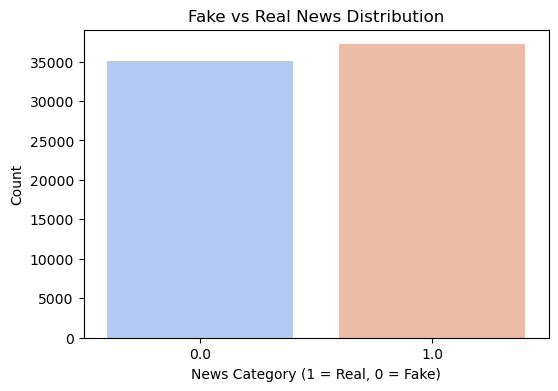

In [54]:
#bar plot of fake vs real news distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Count of Fake (0) and Real (1) News
df1=df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=df1.index, y=df1.values, palette='coolwarm')
plt.xlabel("News Category (1 = Real, 0 = Fake)")
plt.ylabel("Count")
plt.title("Fake vs Real News Distribution")
plt.show()

In [55]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


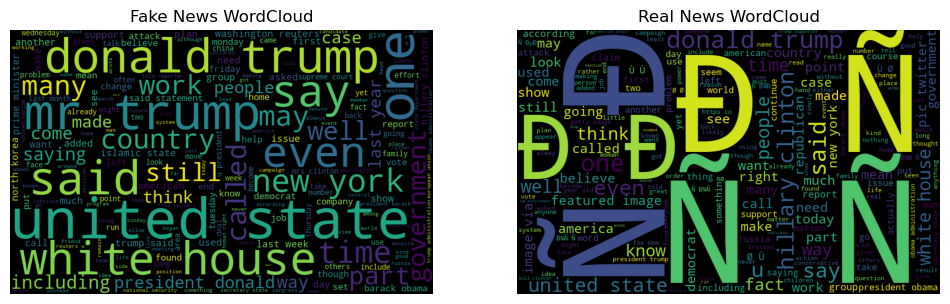

In [56]:
#wordcloud distribution

from wordcloud import WordCloud

fake_text = " ".join(df[df["label"] == 0]["text"])  # Fake News
real_text = " ".join(df[df["label"] == 1]["text"])  # Real News

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=500).generate(fake_text))
plt.title("Fake News WordCloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=500).generate(real_text))
plt.title("Real News WordCloud")
plt.axis("off")

plt.show()

# ***Step-5-Data Preprocessing***

##Convert Text to Lowercase & Remove Punctuation

In [57]:
# Re:-Regular Expressions
import re

def clean_text(text):
    text = text.lower()  #Convert to lowercase
    text = re.sub(r'\W+',' ',text)  #Remove punctuation & special characters
    return text                       #(\W means anything that is NOT a letter, digit, or underscore).

df['text'] = df['text'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

##Remove Stopwords & Tokenization

In [58]:
#natural language processing library.

import nltk
from nltk.corpus import stopwords #Contains a list of common words (e.g., "the", "is", "and") that do not add much meaning.
from nltk.tokenize import word_tokenize #Splits text into individual words.
import string  #A list of punctuation marks (e.g., .,!?;)

#download necessary datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))#retrieves a predefined list of stopwords (common words like "the", "is", "and") from NLTK.
print(stopwords)
def remove_stopwords(text):
    if isinstance(text, str):  #Ensure text is a string before processing
        words = word_tokenize(text.lower())  #Lowercase text
        words = [word for word in words if word not in stop_words and word not in string.punctuation]  #Remove stopwords & punctuation
        return " ".join(words)
    return text  #Return as-is if not a string (avoids errors)

#Apply function safely
df = df.dropna(subset=['text', 'title'])  #Remove missing values
df['text'] = df['text'].apply(remove_stopwords)
df['title'] = df['title'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<WordListCorpusReader in 'C:\\Users\\Pc\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


## Apply TF-IDF Vectorization (Term Frequency - Inverse Document Frequency)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X = vectorizer.fit_transform(df['text'])

# Convert labels to binary (0 = fake, 1 = real)
y = df['label']

In [60]:
y

0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
72185    0.0
72186    1.0
72187    0.0
72188    0.0
72189    1.0
Name: label, Length: 72190, dtype: float64

# ***Step 7: Model Selection & Training***

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Train Multiple Machine Learning Models

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Naïve Bayes Model
nb_model = MultinomialNB() # (MultinomialNB) specifically for text classification
nb_model.fit(X_train, y_train)

# Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# ***Step 8: Model Evaluation***

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

print("Naïve Bayes Performance:")
evaluate_model(nb_model, X_test, y_test)

print("\nLogistic Regression Performance:")
evaluate_model(lr_model, X_test, y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_model, X_test, y_test)


Naïve Bayes Performance:
Accuracy: 0.850741099875329
Precision: 0.8398391907664375
Recall: 0.8756084369929692
F1 Score: 0.8573508969351956

Logistic Regression Performance:
Accuracy: 0.9432746917855659
Precision: 0.9368938488109473
Recall: 0.9534883720930233
F1 Score: 0.945118273805535

Random Forest Performance:
Accuracy: 0.9473611303504641
Precision: 0.9342931937172775
Recall: 0.9651162790697675
F1 Score: 0.9494546421920723


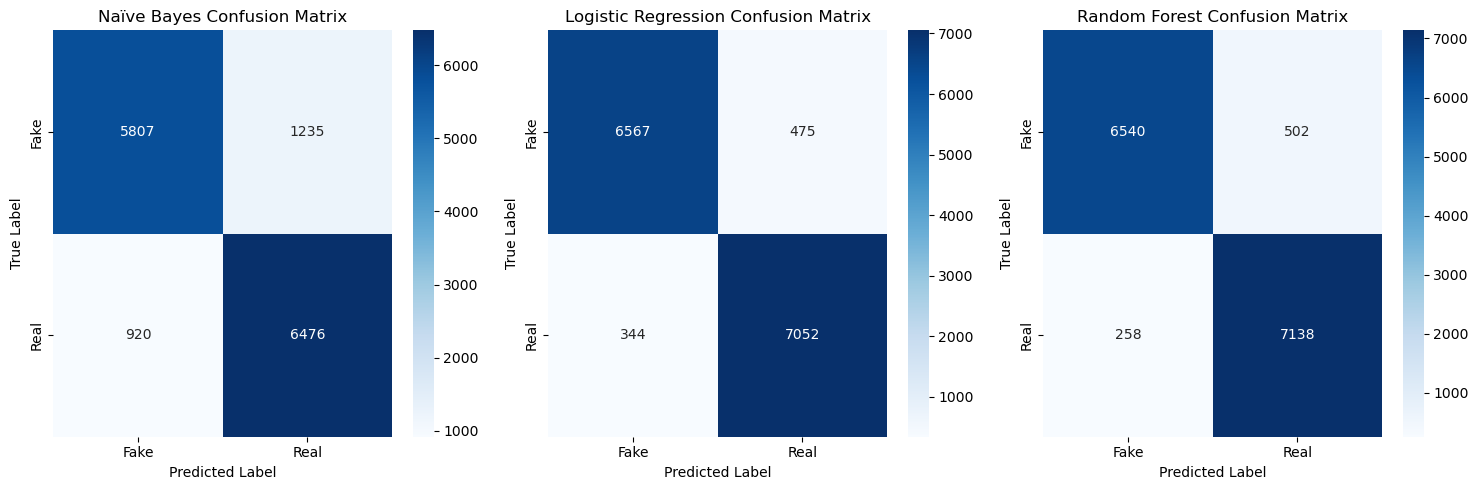

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models
models = [nb_model, lr_model, rf_model]
titles = ["Naïve Bayes", "Logistic Regression", "Random Forest"]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{titles[i]} Confusion Matrix")

plt.tight_layout()
plt.show()

In [69]:
# Save cleaned dataset to CSV
df.to_csv("cleaned_fake_news.csv", index=False)

print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [71]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open("tfidf.pkl", "wb") as tfidf_file:
    pickle.dump(vectorizer, tfidf_file)
